<a href="https://colab.research.google.com/github/Kingslyno/CAPSTONE/blob/main/Module_4_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install pandas numpy matplotlib scikit-learn xgboost


In [9]:
from google.colab import files
uploaded = files.upload()

Saving Cleaned_dataset.csv to Cleaned_dataset (1).csv


In [10]:
# Module 4 Assignment - Model development using Linear regression analytic technique
# Data Analysis of a bookshop
# Kingsley Edionwe
# Learners ID: 157398

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Step 1: Load the dataset
#file_path = r"C:\Users\kings\OneDrive\Desktop\NXU\Class\BAN6800\New folder\Module 3\Cleaned_dataset.csv"
data = pd.read_csv('Cleaned_dataset.csv')

In [13]:
# Step 2: Understand the dataset
print("Dataset shape:", data.shape)
print("Dataset info:")
print(data.info())
print("First 5 rows:")
print(data.head())
print("Summary statistics:")
print(data.describe())

Dataset shape: (17, 19)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           17 non-null     object 
 1   First Name            17 non-null     object 
 2   Last Name             17 non-null     object 
 3   Address               17 non-null     object 
 4   Email Address         17 non-null     object 
 5   Book ID               17 non-null     object 
 6   Title                 17 non-null     object 
 7   Author Full Name      17 non-null     object 
 8   Publication Date      17 non-null     object 
 9   Quantity_Available    17 non-null     int64  
 10  Order ID              17 non-null     object 
 11  Customer ID.1         17 non-null     object 
 12  Book_ID               17 non-null     object 
 13  Date Purchased        17 non-null     object 
 14  Amount Paid           17 non-null     

In [14]:
# Step 3: Data cleaning and preprocessing (if needed)
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
Customer_ID             0
First Name              0
Last Name               0
Address                 0
Email Address           0
Book ID                 0
Title                   0
Author Full Name        0
Publication Date        0
Quantity_Available      0
Order ID                0
Customer ID.1           0
Book_ID                 0
Date Purchased          0
Amount Paid             0
Quantity_Sold           0
Order Status            0
Shipping Address        0
Amount Paid per Unit    0
dtype: int64


In [15]:
# Drop rows with missing values (or handle as needed)
data_clean = data.dropna()

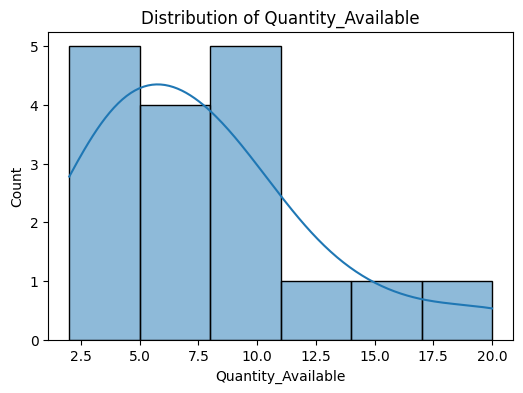

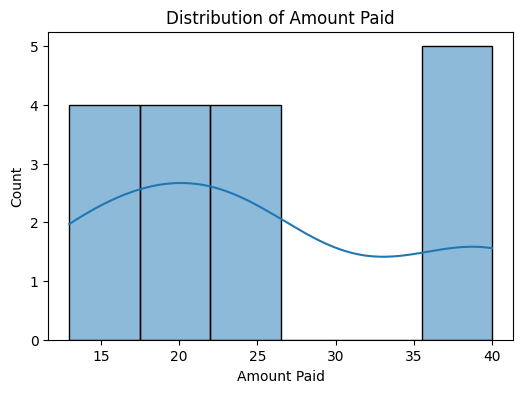

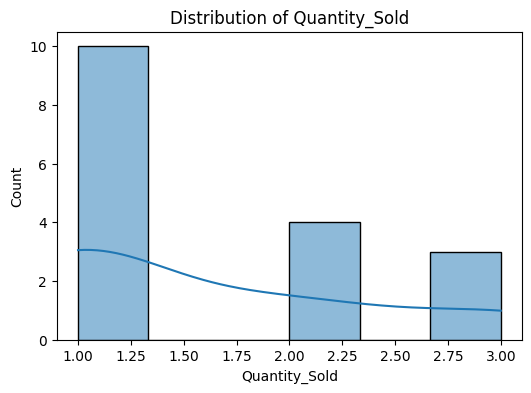

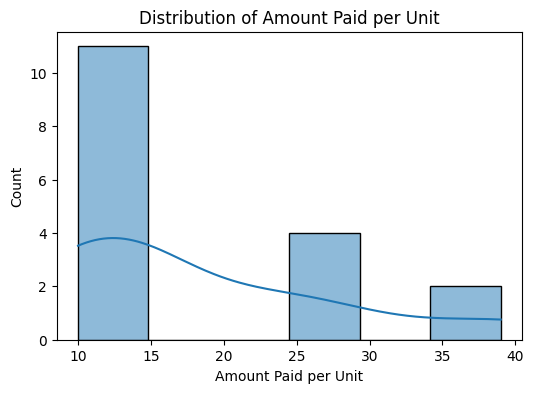

In [16]:
# Step 4: Exploratory Data Analysis (EDA)
# Visualize distributions of numerical variables
numerical_cols = data_clean.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [17]:
# Assuming data_clean is already defined and cleaned
# Select only numeric columns for correlation
numeric_data = data_clean.select_dtypes(include=['number'])

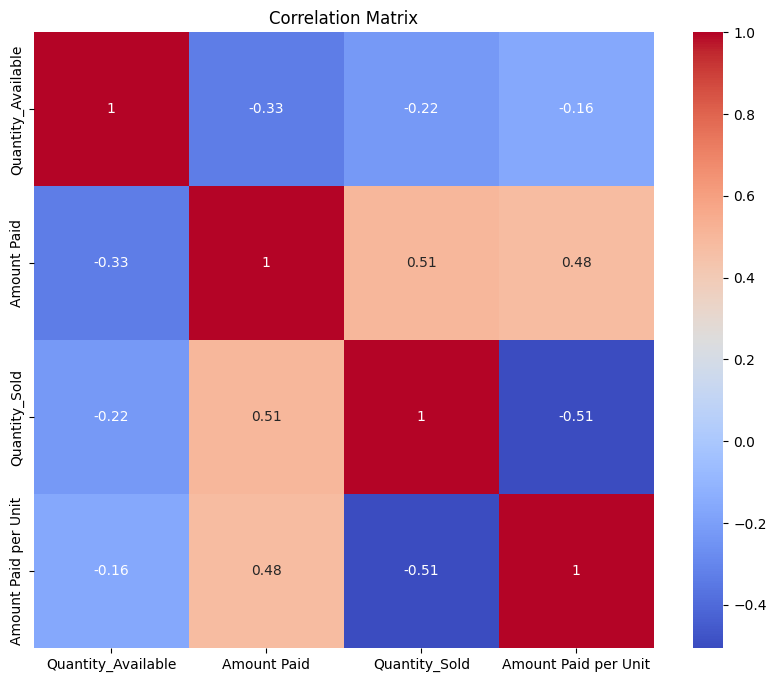

In [18]:
# Visualize correlations
plt.figure(figsize=(10, 8))
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Step 5: Feature selection
# The target variable is the last numerical column
target = numerical_cols[-1]
features = numerical_cols.copy()
features.remove(target)

X = data_clean[features]
y = data_clean[target]

In [20]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Step 7: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Step 8: Model development - Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
# Step 9: Model evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 1.6592
R-squared: 0.9886


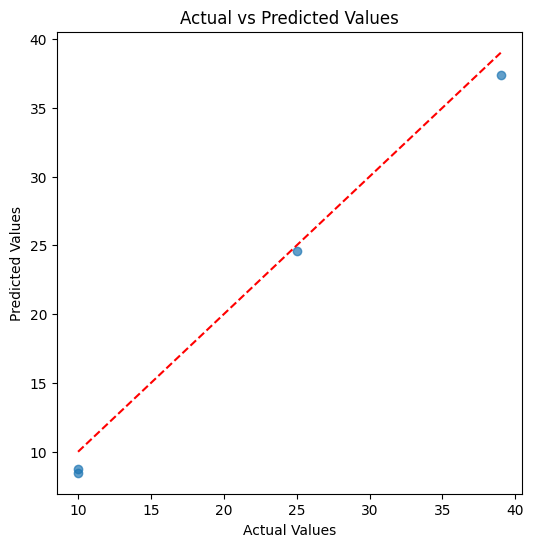

In [24]:
# Step 10: Visualize actual vs predicted values
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [25]:
# Step 11: Determine quantities of books available and quantities sold
# Assuming columns related to books availability and sales are named accordingly
# let's assume columns: 'Book_ID', 'Quantity_Available', 'Quantity_Sold', 'Customer_ID'

# Aggregate total quantities available and sold per book
books_summary = data.groupby('Book_ID').agg({
    'Quantity_Available': 'sum',
    'Quantity_Sold': 'sum'
}).reset_index()



In [26]:
# Step 12: Customer ranking based on books purchased
# Calculate total books purchased by each customer
customer_purchases = data.groupby('Customer_ID')['Quantity_Sold'].sum().reset_index()
customer_purchases = customer_purchases.sort_values(by='Quantity_Sold', ascending=False)
customer_purchases['Rank'] = range(1, len(customer_purchases) + 1)
print(customer_purchases.head(10))


   Customer_ID  Quantity_Sold  Rank
3         C004              3     1
5         C006              3     2
7         C008              3     3
11        C012              3     4
9         C010              2     5
13        C014              2     6
1         C002              2     7
2         C003              1     8
6         C007              1     9
4         C005              1    10


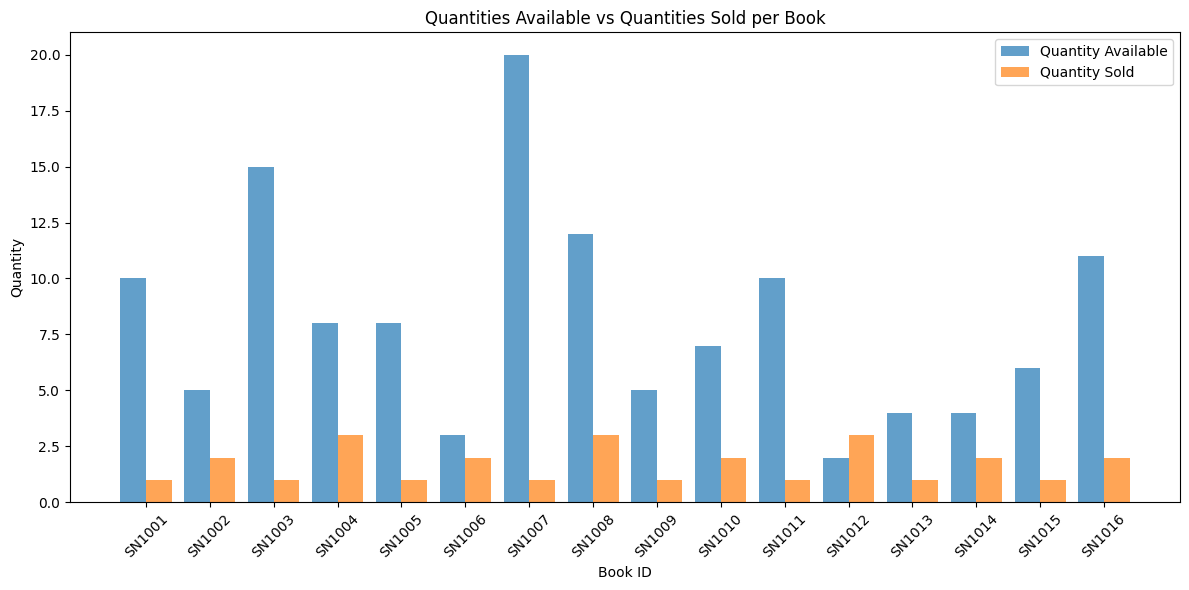

In [27]:
# Step 13: Visualize the results
# Visualization 1: Bar plot of quantities available vs quantities sold per book
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = range(len(books_summary))

plt.bar(index, books_summary['Quantity_Available'], bar_width, label='Quantity Available', alpha=0.7)
plt.bar([i + bar_width for i in index], books_summary['Quantity_Sold'], bar_width, label='Quantity Sold', alpha=0.7)

plt.xlabel('Book ID')
plt.ylabel('Quantity')
plt.title('Quantities Available vs Quantities Sold per Book')
plt.xticks([i + bar_width / 2 for i in index], books_summary['Book_ID'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()




/tmp/ipython-input-3591615723.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity_Sold', y='Customer_ID', data=top_customers, palette='viridis')


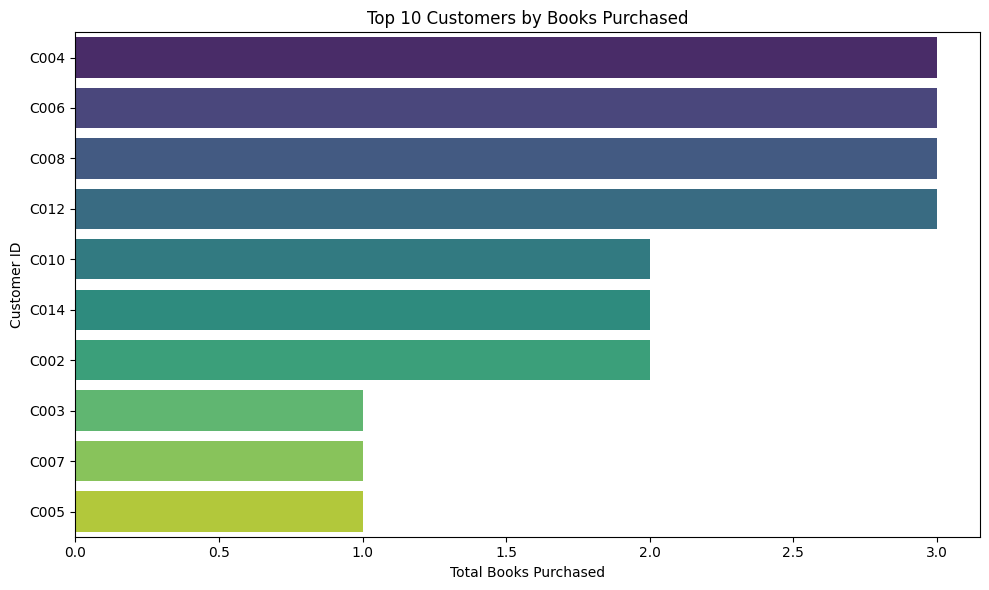

In [28]:
# Visualization 2: Top 10 customers by books purchased
top_customers = customer_purchases.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity_Sold', y='Customer_ID', data=top_customers, palette='viridis')
plt.xlabel('Total Books Purchased')
plt.ylabel('Customer ID')
plt.title('Top 10 Customers by Books Purchased')
plt.tight_layout()
plt.show()